In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)});
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/churn_clean.csv').drop('Unnamed: 0', axis=1)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,night_call_length_per_call,intl_call_length_per_call,day_charge_per_min,eve_charge_per_min,night_charge_per_min,intl_charge_per_min,day_charge_percentage,eve_charge_percentage,night_charge_percentage,intl_charge_percentage
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,2.689,3.333,0.17,0.085,0.045,0.27,0.593,0.221,0.145,0.036
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,2.470,4.567,0.17,0.085,0.045,0.27,0.466,0.282,0.194,0.063
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,1.563,2.440,0.17,0.085,0.045,0.27,0.667,0.166,0.118,0.053
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,2.212,0.943,0.17,0.085,0.045,0.27,0.760,0.079,0.132,0.027
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,1.545,3.367,0.17,0.085,0.045,0.27,0.545,0.242,0.162,0.052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_length              3333 non-null   int64  
 1   international_plan          3333 non-null   int64  
 2   voice_mail_plan             3333 non-null   int64  
 3   number_vmail_messages       3333 non-null   int64  
 4   total_day_minutes           3333 non-null   float64
 5   total_day_calls             3333 non-null   int64  
 6   total_day_charge            3333 non-null   float64
 7   total_eve_minutes           3333 non-null   float64
 8   total_eve_calls             3333 non-null   int64  
 9   total_eve_charge            3333 non-null   float64
 10  total_night_minutes         3333 non-null   float64
 11  total_night_calls           3333 non-null   int64  
 12  total_night_charge          3333 non-null   float64
 13  total_intl_minutes          3333 

## Account Length

NonChurn and Churn Customer Numbers:
 0    2850
1     483
Name: churn, dtype: int64
NonChurn and Churn Customer Percentage:
 0    0.86
1    0.14
Name: churn, dtype: float64


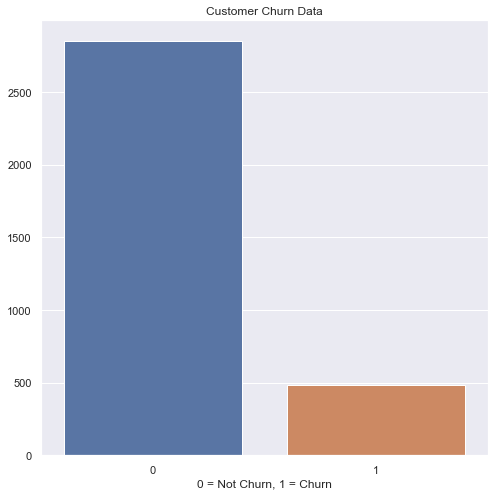

In [5]:
print('NonChurn and Churn Customer Numbers:\n', df['churn'].value_counts())
print('NonChurn and Churn Customer Percentage:\n', round(df['churn'].value_counts(normalize=True),2))
churn  = round(df['churn']).value_counts()
plt.figure(figsize=(8,8))
sns.barplot(churn.index, churn.values)
plt.title('Customer Churn Data')
plt.xlabel('0 = Not Churn, 1 = Churn')
plt.show();

In [6]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.065,39.822,1.000,74.000,101.000,127.000,243.000
international_plan,3333.0,0.097,0.296,0.000,0.000,0.000,0.000,1.000
voice_mail_plan,3333.0,0.277,0.447,0.000,0.000,0.000,1.000,1.000
number_vmail_messages,3333.0,8.099,13.688,0.000,0.000,0.000,20.000,51.000
total_day_minutes,3333.0,179.775,54.467,0.000,143.700,179.400,216.400,350.800
total_day_calls,3333.0,100.436,20.069,0.000,87.000,101.000,114.000,165.000
total_day_charge,3333.0,30.562,9.259,0.000,24.430,30.500,36.790,59.640
total_eve_minutes,3333.0,200.980,50.714,0.000,166.600,201.400,235.300,363.700
total_eve_calls,3333.0,100.114,19.923,0.000,87.000,100.000,114.000,170.000
total_eve_charge,3333.0,17.084,4.311,0.000,14.160,17.120,20.000,30.910


Account Length Mean Value: 3.37
Account Length Standard Deviation: 1.33


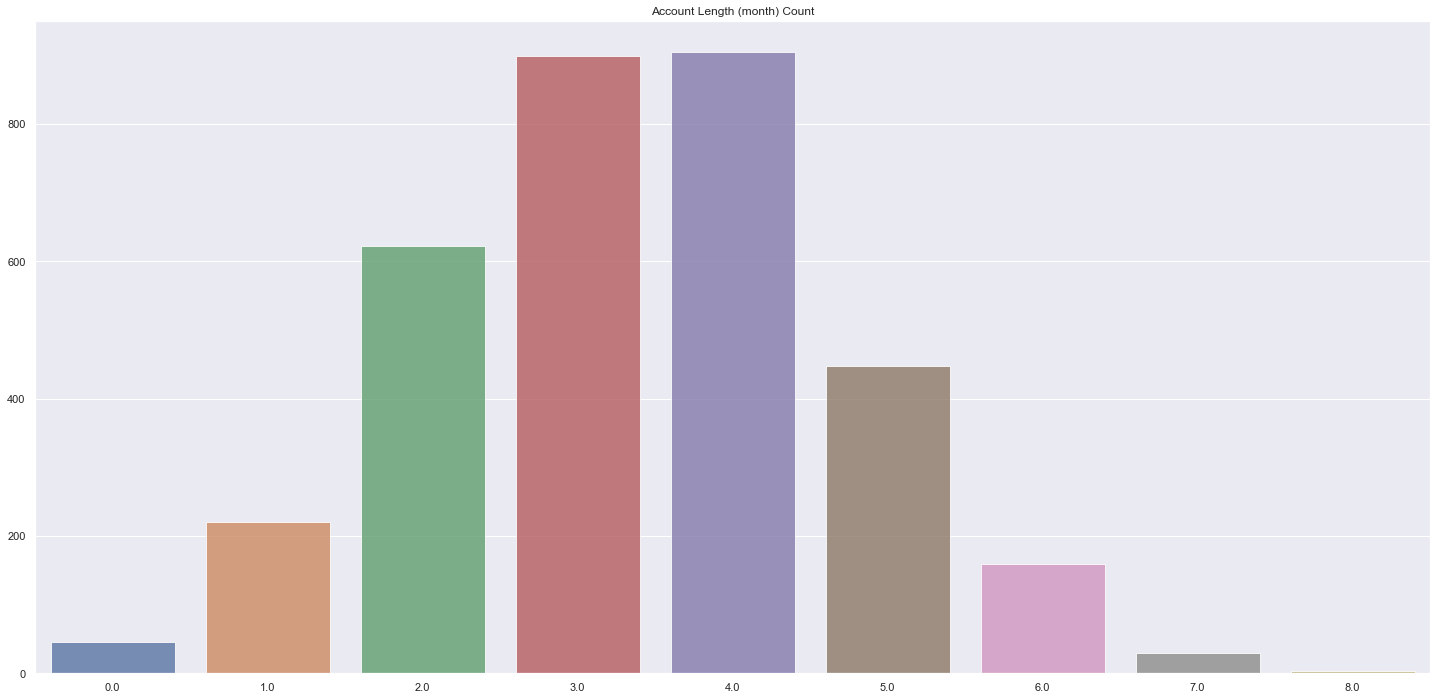

In [7]:
account_length_count  = round(df['account_length']/30).value_counts()
print('Account Length Mean Value:', round((df['account_length']/30).mean(),2))
print('Account Length Standard Deviation:', round((df['account_length']/30).std(),2))
plt.figure(figsize=(25,12))
sns.barplot(account_length_count.index, account_length_count.values, alpha=0.8)
plt.title('Account Length (month) Count')
plt.show();

Not Churn Account Length Mean Value         : 3.36
Not Churn Account Length Standard Deviation : 1.33
Churn Account Length Mean Value             : 3.42
Churn Account Length Standard Deviation     : 1.32


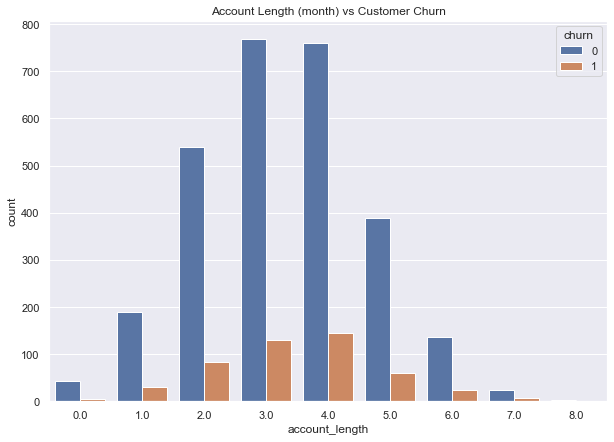

In [8]:
print('Not Churn Account Length Mean Value         :', round((df[df['churn']==0]['account_length']/30).mean(),2))
print('Not Churn Account Length Standard Deviation :', round((df[df['churn']==0]['account_length']/30).std(),2))
print('Churn Account Length Mean Value             :', round((df[df['churn']==1]['account_length']/30).mean(),2))
print('Churn Account Length Standard Deviation     :', round((df[df['churn']==1]['account_length']/30).std(),2))

sns.countplot(x=round(df['account_length']/30), hue='churn', data=df);
plt.title('Account Length (month) vs Customer Churn')
plt.show();

## International Plan

international_plan  churn
0                   0        0.89
                    1        0.11
1                   0        0.58
                    1        0.42
Name: churn, dtype: float64


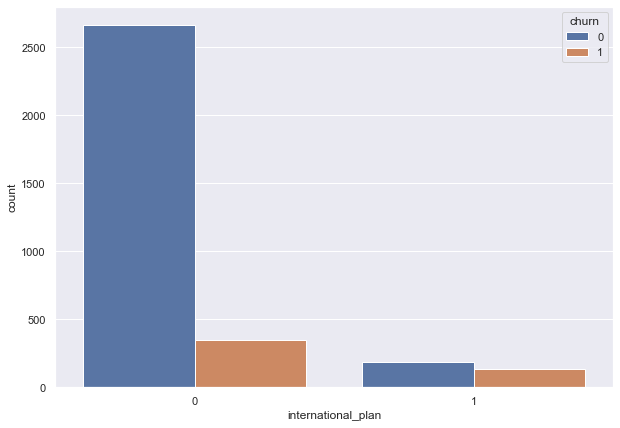

In [9]:
sns.countplot(x='international_plan', hue='churn', data=df);
print(round(df.groupby('international_plan')['churn'].value_counts(normalize=True),2))

In [10]:
df_intl_plan = df[df['international_plan'] == 1]
print('The number of customers with international plan:', len(df_intl_plan))
print(round(df_intl_plan['churn'].value_counts(normalize=True),2))
print('--------------------------------------------------')
df_intl_no_plan = df[df['international_plan'] == 0]
print('The number of customers with no international plan:', len(df_intl_no_plan))
print(round(df_intl_no_plan['churn'].value_counts(normalize=True),2))

The number of customers with international plan: 323
0    0.58
1    0.42
Name: churn, dtype: float64
--------------------------------------------------
The number of customers with no international plan: 3010
0    0.89
1    0.11
Name: churn, dtype: float64


In [11]:
df.groupby('churn')['international_plan'].value_counts()

churn  international_plan
0      0                     2664
       1                      186
1      0                      346
       1                      137
Name: international_plan, dtype: int64

In [19]:
df_intl = df[['international_plan', 'total_intl_minutes', 'total_intl_calls', 
                      'total_intl_charge', 'intl_charge_per_call', 'intl_call_length_per_call', 
                      'intl_charge_per_min', 'intl_charge_percentage', 'total_charges', 'churn']]
df_intl.describe().T

,count,mean,std,min,25%,50%,75%,max
international_plan,3333.0,0.096910,0.295879,0.0,0.000,0.000,0.000,1.000
total_intl_minutes,3333.0,10.237294,2.791840,0.0,8.500,10.300,12.100,20.000
total_intl_calls,3333.0,4.479448,2.461214,0.0,3.000,4.000,6.000,20.000
total_intl_charge,3333.0,2.764581,0.753773,0.0,2.300,2.780,3.270,5.400
intl_charge_per_call,3333.0,0.835893,0.611920,0.0,0.451,0.662,1.025,4.910
intl_call_length_per_call,3333.0,3.095562,2.266218,0.0,1.671,2.450,3.800,18.200
intl_charge_per_min,3333.0,0.268593,0.019798,0.0,0.270,0.270,0.270,0.273
intl_charge_percentage,3333.0,0.047986,0.016007,0.0,0.037,0.047,0.057,0.142
total_charges,3333.0,59.446745,10.507240,23.0,52.000,59.000,66.000,96.000
churn,3333.0,0.144914,0.352067,0.0,0.000,0.000,0.000,1.000


In [20]:
df_intl_plan = df_intl[df_intl['international_plan'] == 1]
print(len(df_intl_plan))
df_intl_no_plan = df_intl[df_intl['international_plan'] == 0]
print(len(df_intl_no_plan))

323
3010


In [21]:
df_intl['international_plan'].value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

In [23]:
round(df_intl.drop('total_charges', axis=1).groupby(['international_plan', 'churn']).describe().T, 3)

international_plan                      0                 1         
churn                                   0        1        0        1
total_intl_minutes        count  2664.000  346.000  186.000  137.000
                          mean     10.185   10.271    9.778   11.782
                          std       2.820    2.633    2.184    2.901
                          min       0.000    2.000    1.300    4.100
                          25%       8.400    8.700    8.400    9.700
                          50%      10.200   10.300   10.100   11.700
                          75%      12.100   12.000   11.300   13.800
                          max      18.900   18.300   13.000   20.000
total_intl_calls          count  2664.000  346.000  186.000  137.000
                          mean      4.493    4.251    5.102    3.942
                          std       2.450    2.373    2.248    2.952
                          min       0.000    1.000    3.000    1.000
                          25%       3.000    3.000    3.000    2.000
                          50%       4.000    4.000    4.000    3.000
                          75%       6.000    5.000    6.000    5.000
                          max      19.000   15.000   15.000   20.000
total_intl_charge         count  2664.000  346.000  186.000  137.000
                          mean      2.751    2.774    2.641    3.181
                          std       0.761    0.711    0.589    0.783
                          min       0.000    0.540    0.350    1.110
                          25%       2.270    2.350    2.270    2.620
                          50%       2.750    2.780    2.730    3.160
                          75%       3.270    3.240    3.050    3.730
                          max       5.100    4.940    3.510    5.400
intl_charge_per_call      count  2664.000  346.000  186.000  137.000
                          mean      0.829    0.880    0.607    1.172
                          std       0.617    0.599    0.265    0.724
                          min       0.000    0.081    0.058    0.187
                          25%       0.445    0.477    0.392    0.647
                          50%       0.648    0.748    0.586    1.105
                          75%       1.015    1.052    0.790    1.485
                          max       4.910    4.000    1.170    4.100
intl_call_length_per_call count  2664.000  346.000  186.000  137.000
                          mean      3.069    3.259    2.248    4.342
                          std       2.284    2.220    0.983    2.682
                          min       0.000    0.300    0.217    0.695
                          25%       1.650    1.767    1.452    2.400
                          50%       2.400    2.771    2.171    4.100
                          75%       3.750    3.892    2.925    5.500
                          max      18.200   14.800    4.333   15.200
intl_charge_per_min       count  2664.000  346.000  186.000  137.000
                          mean      0.268    0.270    0.270    0.270
                          std       0.022    0.000    0.000    0.000
                          min       0.000    0.269    0.269    0.269
                          25%       0.270    0.270    0.270    0.270
                          50%       0.270    0.270    0.270    0.270
                          75%       0.270    0.270    0.270    0.270
                          max       0.273    0.271    0.271    0.271
intl_charge_percentage    count  2664.000  346.000  186.000  137.000
                          mean      0.048    0.044    0.045    0.053
                          std       0.016    0.016    0.013    0.016
                          min       0.000    0.007    0.005    0.017
                          25%       0.038    0.033    0.038    0.040
                          50%       0.047    0.042    0.046    0.052
                          75%       0.058    0.052    0.053    0.064
                          max       0.142    0.119    0.097    0.10

## Churn vs. International Plan Minutes

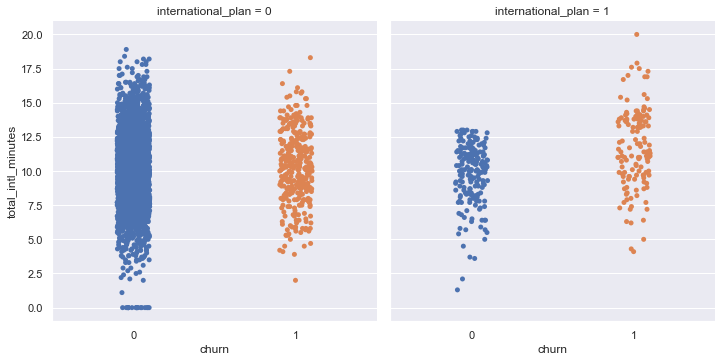

In [24]:
sns.catplot(x='churn', y='total_intl_minutes', col='international_plan', data=df_intl);

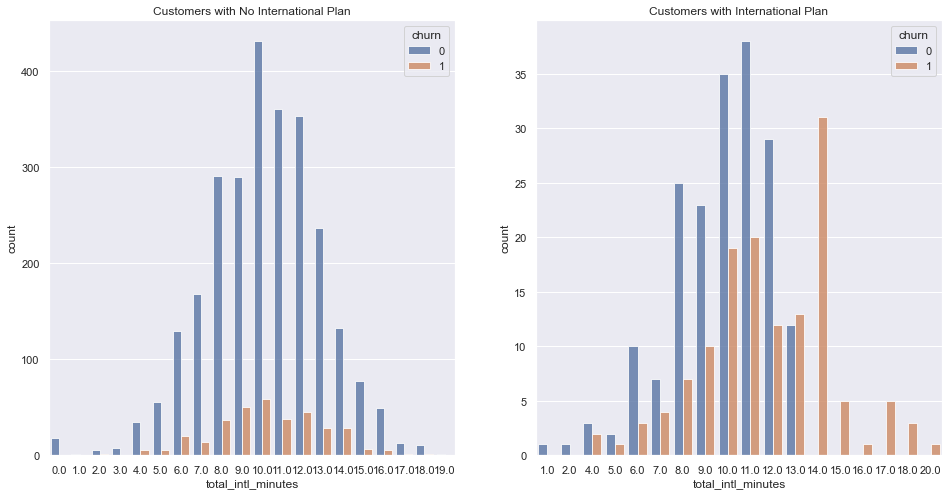

In [26]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['total_intl_minutes']), hue='churn', 
              data=df_intl_no_plan, alpha=0.8, ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['total_intl_minutes']), hue='churn', data=df_intl_plan, 
              alpha=0.8, ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [27]:
df_intl[df_intl['total_intl_minutes'] > 13].groupby('international_plan')['churn'].value_counts()

international_plan  churn
0                   0        387
                    1         55
1                   1         57
Name: churn, dtype: int64

In [28]:
print('Average International Minutes with No International Plan:', round(df_intl_no_plan['total_intl_minutes'].mean(),2))
print('Average International Minutes with International Plan:', round(df_intl_plan['total_intl_minutes'].mean(),2))

Average International Minutes with No International Plan: 10.2
Average International Minutes with International Plan: 10.63


## Churn vs International Calls

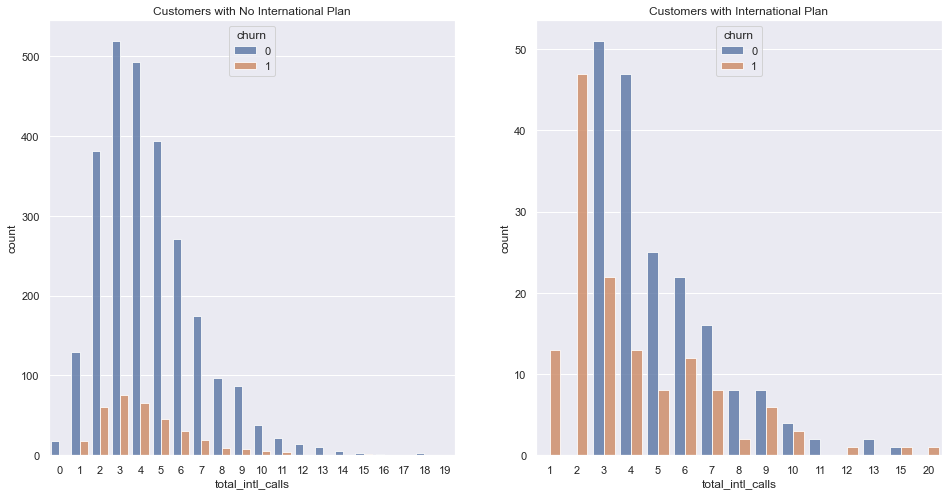

In [29]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x='total_intl_calls', hue='churn', data=df_intl_no_plan, 
              alpha=0.8, ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x='total_intl_calls', hue='churn', data=df_intl_plan, 
              alpha=0.8, ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [30]:
print('Average International Calls with No International Plan:', round(df_intl_no_plan['total_intl_calls'].mean(),2))
print('Average International Calls with International Plan:', round(df_intl_plan['total_intl_calls'].mean(),2))

Average International Calls with No International Plan: 4.47
Average International Calls with International Plan: 4.61


## Churn vs Total Charges International Plan

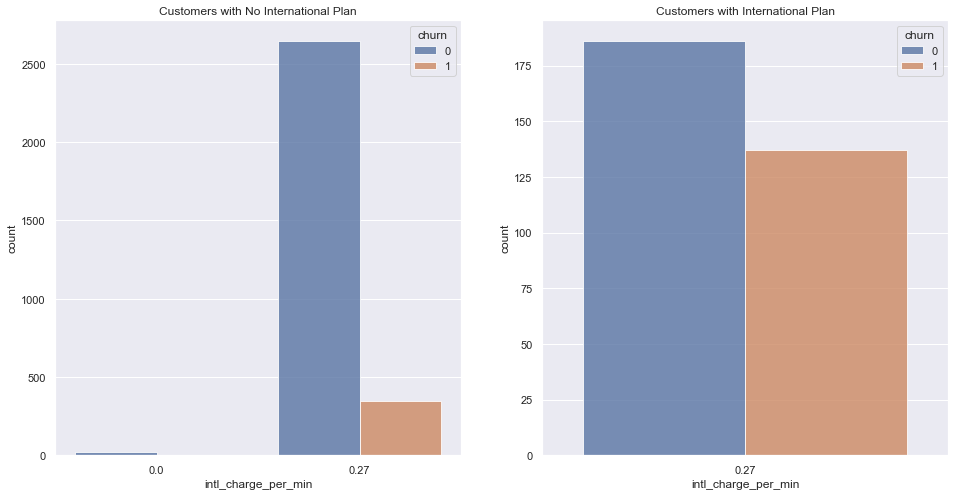

In [31]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['intl_charge_per_min'],2), hue='churn', data=df_intl_no_plan, 
              alpha=0.8, ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['intl_charge_per_min'],2), hue='churn', data=df_intl_plan,  
              alpha=0.8, ax=ax[1]).set_title('Customers with International Plan')
fig.show();

## International Call Length vs Churn

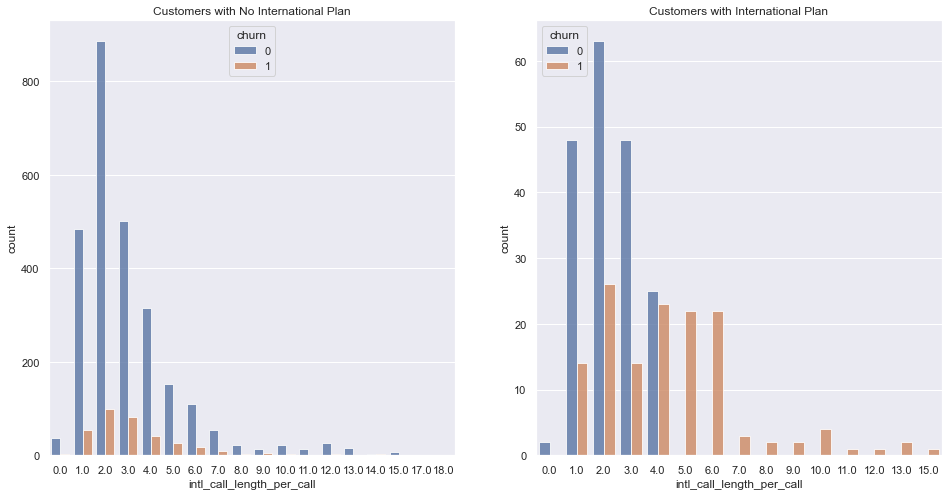

In [32]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['intl_call_length_per_call']), hue='churn', data=df_intl_no_plan, 
              alpha=0.8, ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['intl_call_length_per_call']), hue='churn', data=df_intl_plan, 
              alpha=0.8, ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [33]:
print('Average call length per call with no international plan:',round(df_intl_no_plan['intl_call_length_per_call'].mean(),3))
print('Average call length per call with international plan:',round(df_intl_plan['intl_call_length_per_call'].mean(),3))

Average call length per call with no international plan: 3.091
Average call length per call with international plan: 3.136


## Churn vs. International Charge Per Call

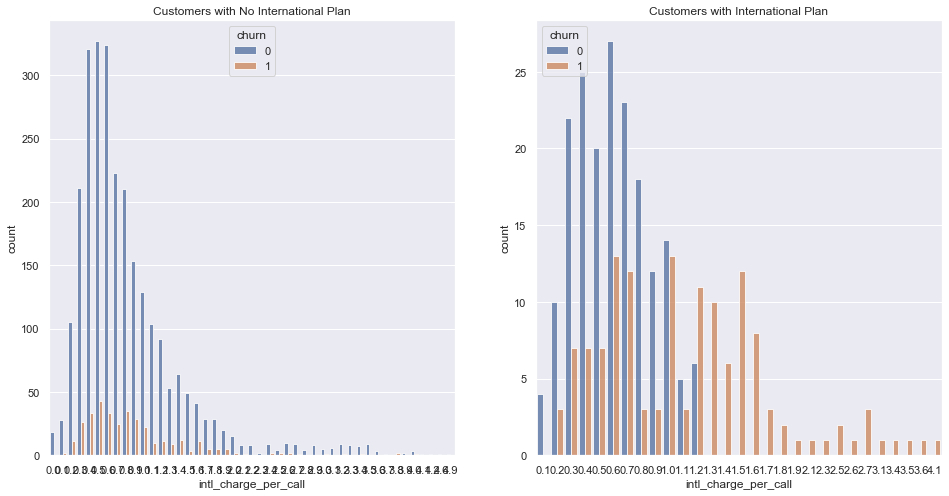

In [37]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['intl_charge_per_call'],1), hue='churn', data=df_intl_no_plan,
              alpha=0.8, ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['intl_charge_per_call'],1), hue='churn', data=df_intl_plan, 
              alpha=0.8, ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [38]:
print('Average international charge per call without international plan',round(df_intl_no_plan['intl_charge_per_call'].mean(),2))
print('Average international charge per call with international plan', round(df_intl_plan['intl_charge_per_call'].mean(),2))

Average international charge per call without international plan 0.83
Average international charge per call with international plan 0.85


## Total International Charge vs International Charge Percentage

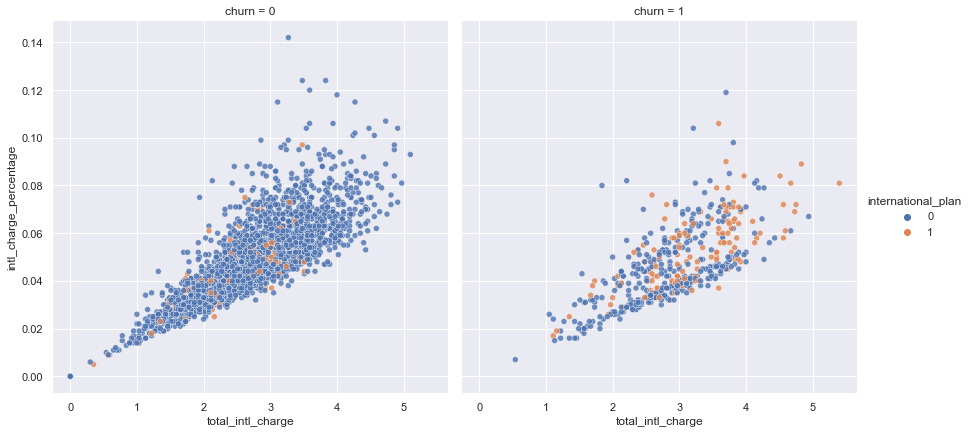

In [39]:
sns.relplot(x='total_intl_charge', y='intl_charge_percentage', hue='international_plan', 
            col='churn', data=df_intl, alpha=0.8, height=6);

In [40]:
df_intl[(df_intl['total_intl_minutes'] == 13)  & (df_intl['total_intl_calls'] == 3)].head()

,international_plan,total_intl_minutes,total_intl_calls,total_intl_charge,intl_charge_per_call,intl_call_length_per_call,intl_charge_per_min,intl_charge_percentage,total_charges,churn
199,0,13.0,3,3.51,1.17,4.333,0.27,0.080,44.0,0
273,0,13.0,3,3.51,1.17,4.333,0.27,0.054,65.0,0
935,0,13.0,3,3.51,1.17,4.333,0.27,0.049,72.0,0
1970,0,13.0,3,3.51,1.17,4.333,0.27,0.058,60.0,0
2165,0,13.0,3,3.51,1.17,4.333,0.27,0.058,61.0,0


## Voicemail Plan

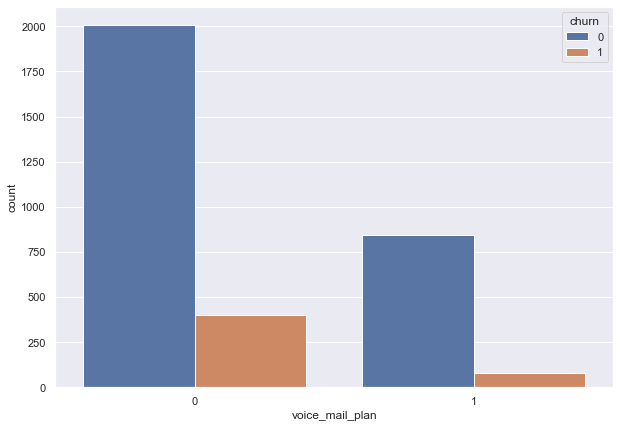

In [41]:
sns.countplot(x='voice_mail_plan', hue='churn', data=df);

In [42]:
print(df.groupby('churn')['voice_mail_plan'].value_counts())
round(df.groupby('churn')['voice_mail_plan'].value_counts(normalize=True),2)

churn  voice_mail_plan
0      0                  2008
       1                   842
1      0                   403
       1                    80
Name: voice_mail_plan, dtype: int64


churn  voice_mail_plan
0      0                  0.70
       1                  0.30
1      0                  0.83
       1                  0.17
Name: voice_mail_plan, dtype: float64

In [44]:
print('Average Voicemail Messages for Customers With Voicemail Plan:', 
      round(df[df['voice_mail_plan'] == 1]['number_vmail_messages'].mean(),2))
print('Average Voicemail Messages for Customers With Voicemail Plan Who Churn:', 
      round(df[(df['voice_mail_plan'] == 1) & (df['churn'] == 1)]['number_vmail_messages'].mean(),2))
print('Average Voicemail Messages for Customers With Voicemail Plan Who Not Churn:', 
      round(df[(df['voice_mail_plan'] == 1) & (df['churn'] == 0)]['number_vmail_messages'].mean(),2))

Average Voicemail Messages for Customers With Voicemail Plan: 29.28
Average Voicemail Messages for Customers With Voicemail Plan Who Churn: 30.89
Average Voicemail Messages for Customers With Voicemail Plan Who Not Churn: 29.12


## Total Charges vs. Churn

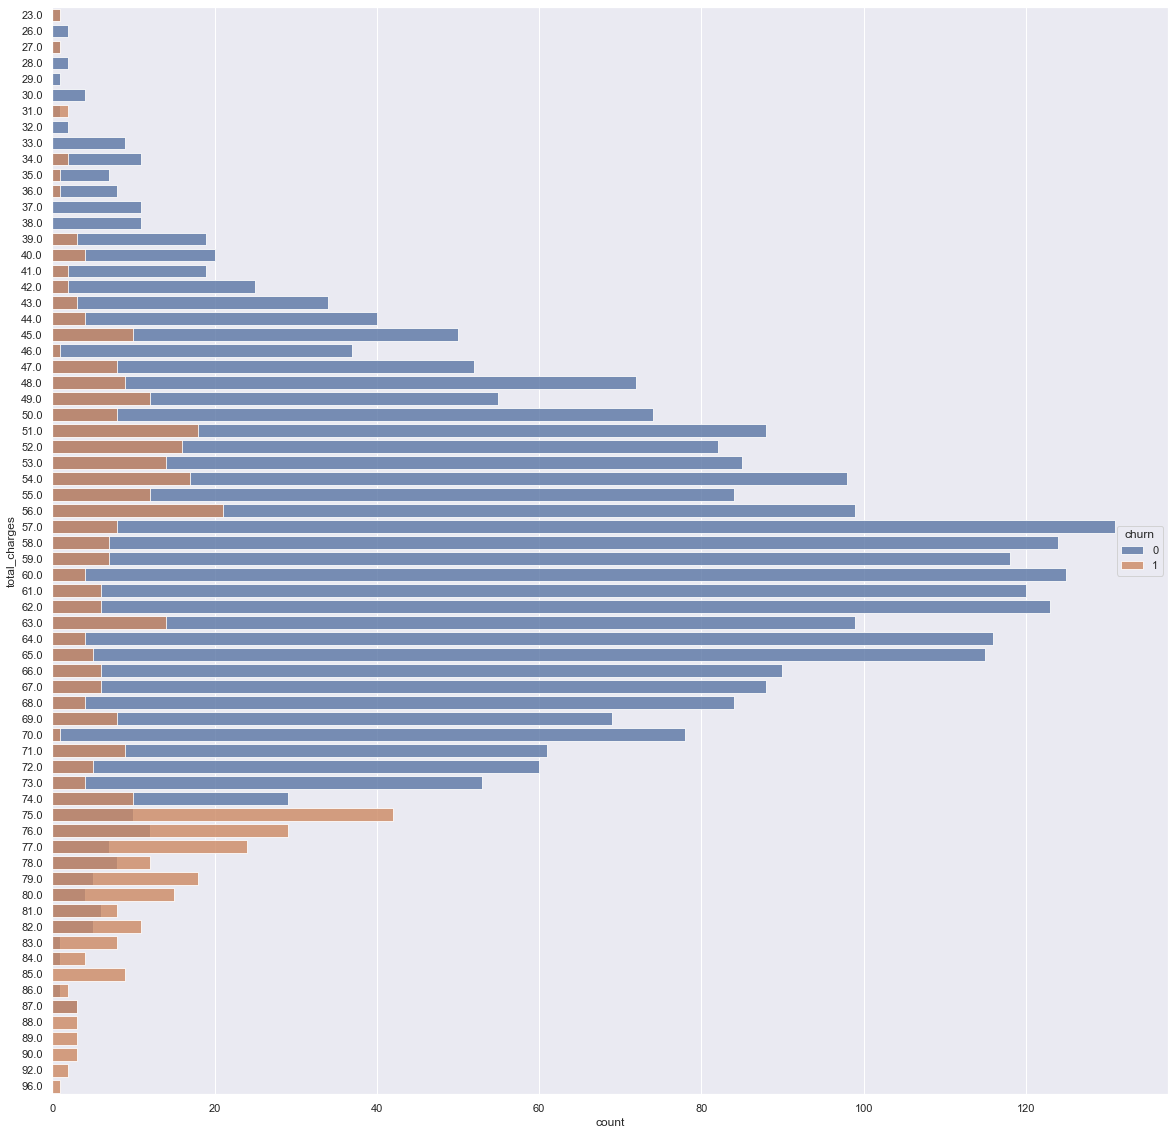

In [47]:
plt.figure(figsize=(20,20))
sns.countplot(y='total_charges', hue='churn', data=df, dodge=False, alpha=0.8)
plt.show();

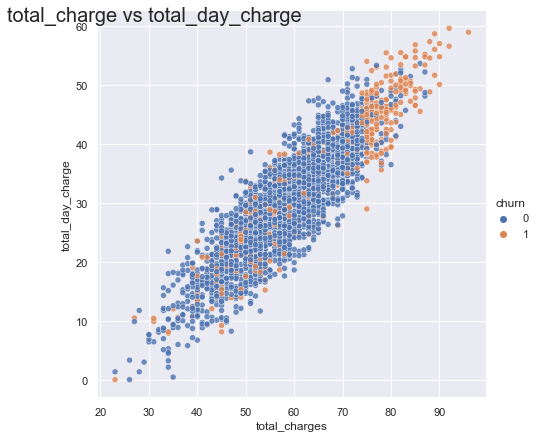

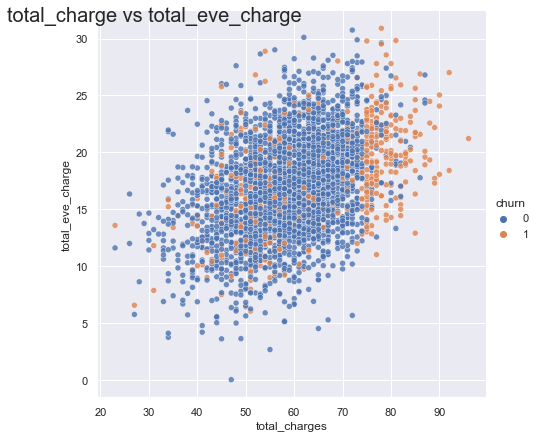

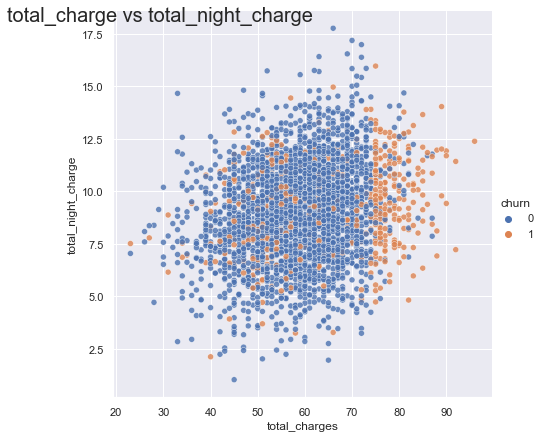

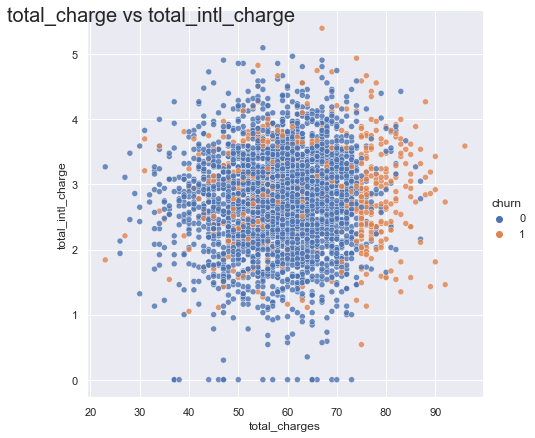

In [48]:
cols = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge' ]

for col in cols:
    g = sns.relplot(x='total_charges', y=col, hue='churn', data=df, alpha=0.8, height=6)                   
    g.fig.suptitle('total_charge vs {}'.format(col), x=0.2, y=0.98, fontsize=20)

In [50]:
round(df.groupby('churn')['total_charges', 'total_day_charge', 'total_eve_charge', 
                'total_night_charge', 'total_intl_charge'].describe().T,2)

churn                           0       1
total_charges      count  2850.00  483.00
                   mean     58.45   65.35
                   std       9.47   13.88
                   min      23.00   23.00
                   25%      52.00   53.00
                   50%      59.00   67.00
                   75%      65.00   77.00
                   max      87.00   96.00
total_day_charge   count  2850.00  483.00
                   mean     29.78   35.18
                   std       8.53   11.73
                   min       0.00    0.00
                   25%      24.28   26.06
                   50%      30.12   36.99
                   75%      35.75   45.21
                   max      53.65   59.64
total_eve_charge   count  2850.00  483.00
                   mean     16.92   18.05
                   std       4.27    4.40
                   min       0.00    6.03
                   25%      13.98   15.06
                   50%      16.97   17.96
                   75%      19.82   21.20
                   max      30.75   30.91
total_night_charge count  2850.00  483.00
                   mean      9.01    9.24
                   std       2.30    2.12
                   min       1.04    2.13
                   25%       7.47    7.70
                   50%       9.01    9.22
                   75%      10.57   10.80
                   max      17.77   15.97
total_intl_charge  count  2850.00  483.00
                   mean      2.74    2.89
                   std       0.75    0.75
                   min       0.00    0.54
                   25%       2.27    2.38
                   50%       2.75    2.86
                   75%       3.24    3.46
                   max       5.10    5.40

## Customer Service Calls vs Churn

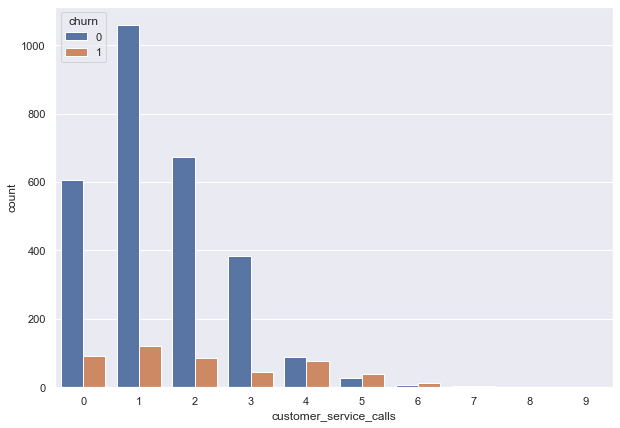

In [52]:
sns.countplot(x='customer_service_calls', hue='churn', data=df);

In [53]:
df.groupby('customer_service_calls')['churn'].value_counts()

customer_service_calls  churn
0                       0         605
                        1          92
1                       0        1059
                        1         122
2                       0         672
                        1          87
3                       0         385
                        1          44
4                       0          90
                        1          76
5                       1          40
                        0          26
6                       1          14
                        0           8
7                       1           5
                        0           4
8                       0           1
                        1           1
9                       1           2
Name: churn, dtype: int64

In [54]:
print('The number of customers who made 3 or less customer service calls:', 
      len(df[df['customer_service_calls'] <= 3]))
print(round(df[df['customer_service_calls'] <= 3]['churn'].value_counts(normalize=True),2))
print(df[df['customer_service_calls'] <= 3]['churn'].value_counts())

print('----------------------------------------------------------------------')
print('The number of customers who made more than 3 customer service calls:', 
      len(df[df['customer_service_calls'] > 3]))
print(round(df[df['customer_service_calls'] > 3]['churn'].value_counts(normalize=True),2))
print(df[df['customer_service_calls'] > 3]['churn'].value_counts())

The number of customers who made 3 or less customer service calls: 3066
0    0.89
1    0.11
Name: churn, dtype: float64
0    2721
1     345
Name: churn, dtype: int64
----------------------------------------------------------------------
The number of customers who made more than 3 customer service calls: 267
1    0.52
0    0.48
Name: churn, dtype: float64
1    138
0    129
Name: churn, dtype: int64


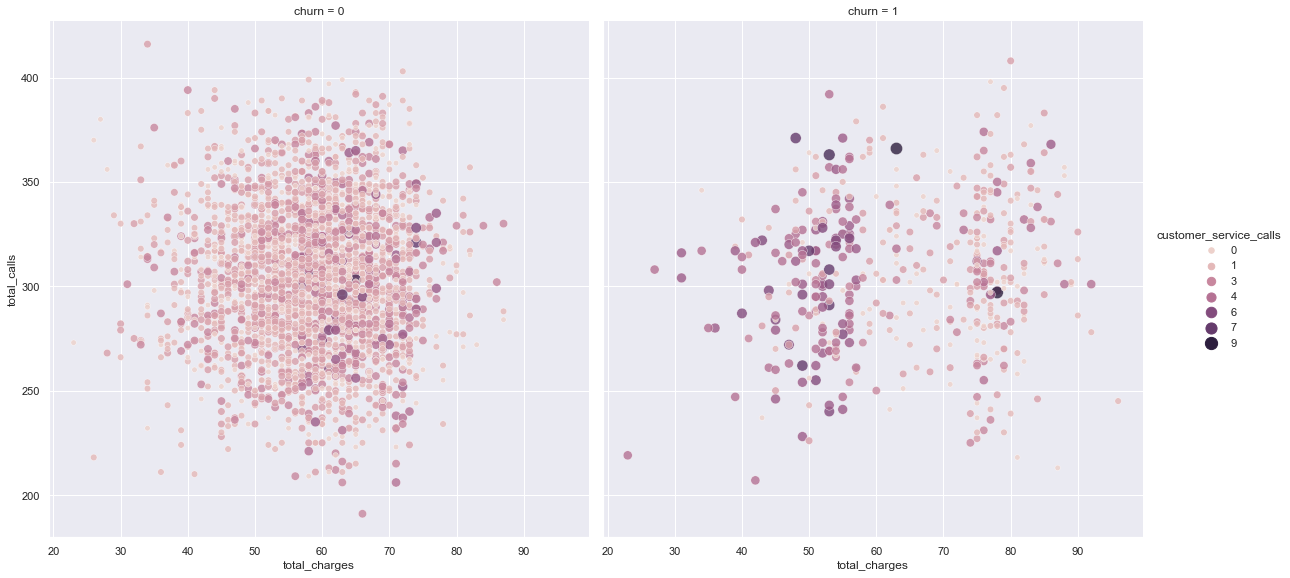

In [56]:
sns.relplot(x='total_charges', y='total_calls', hue='customer_service_calls', col='churn', data=df,                 
            alpha=0.8, height=8, size='customer_service_calls', sizes=(30,150));

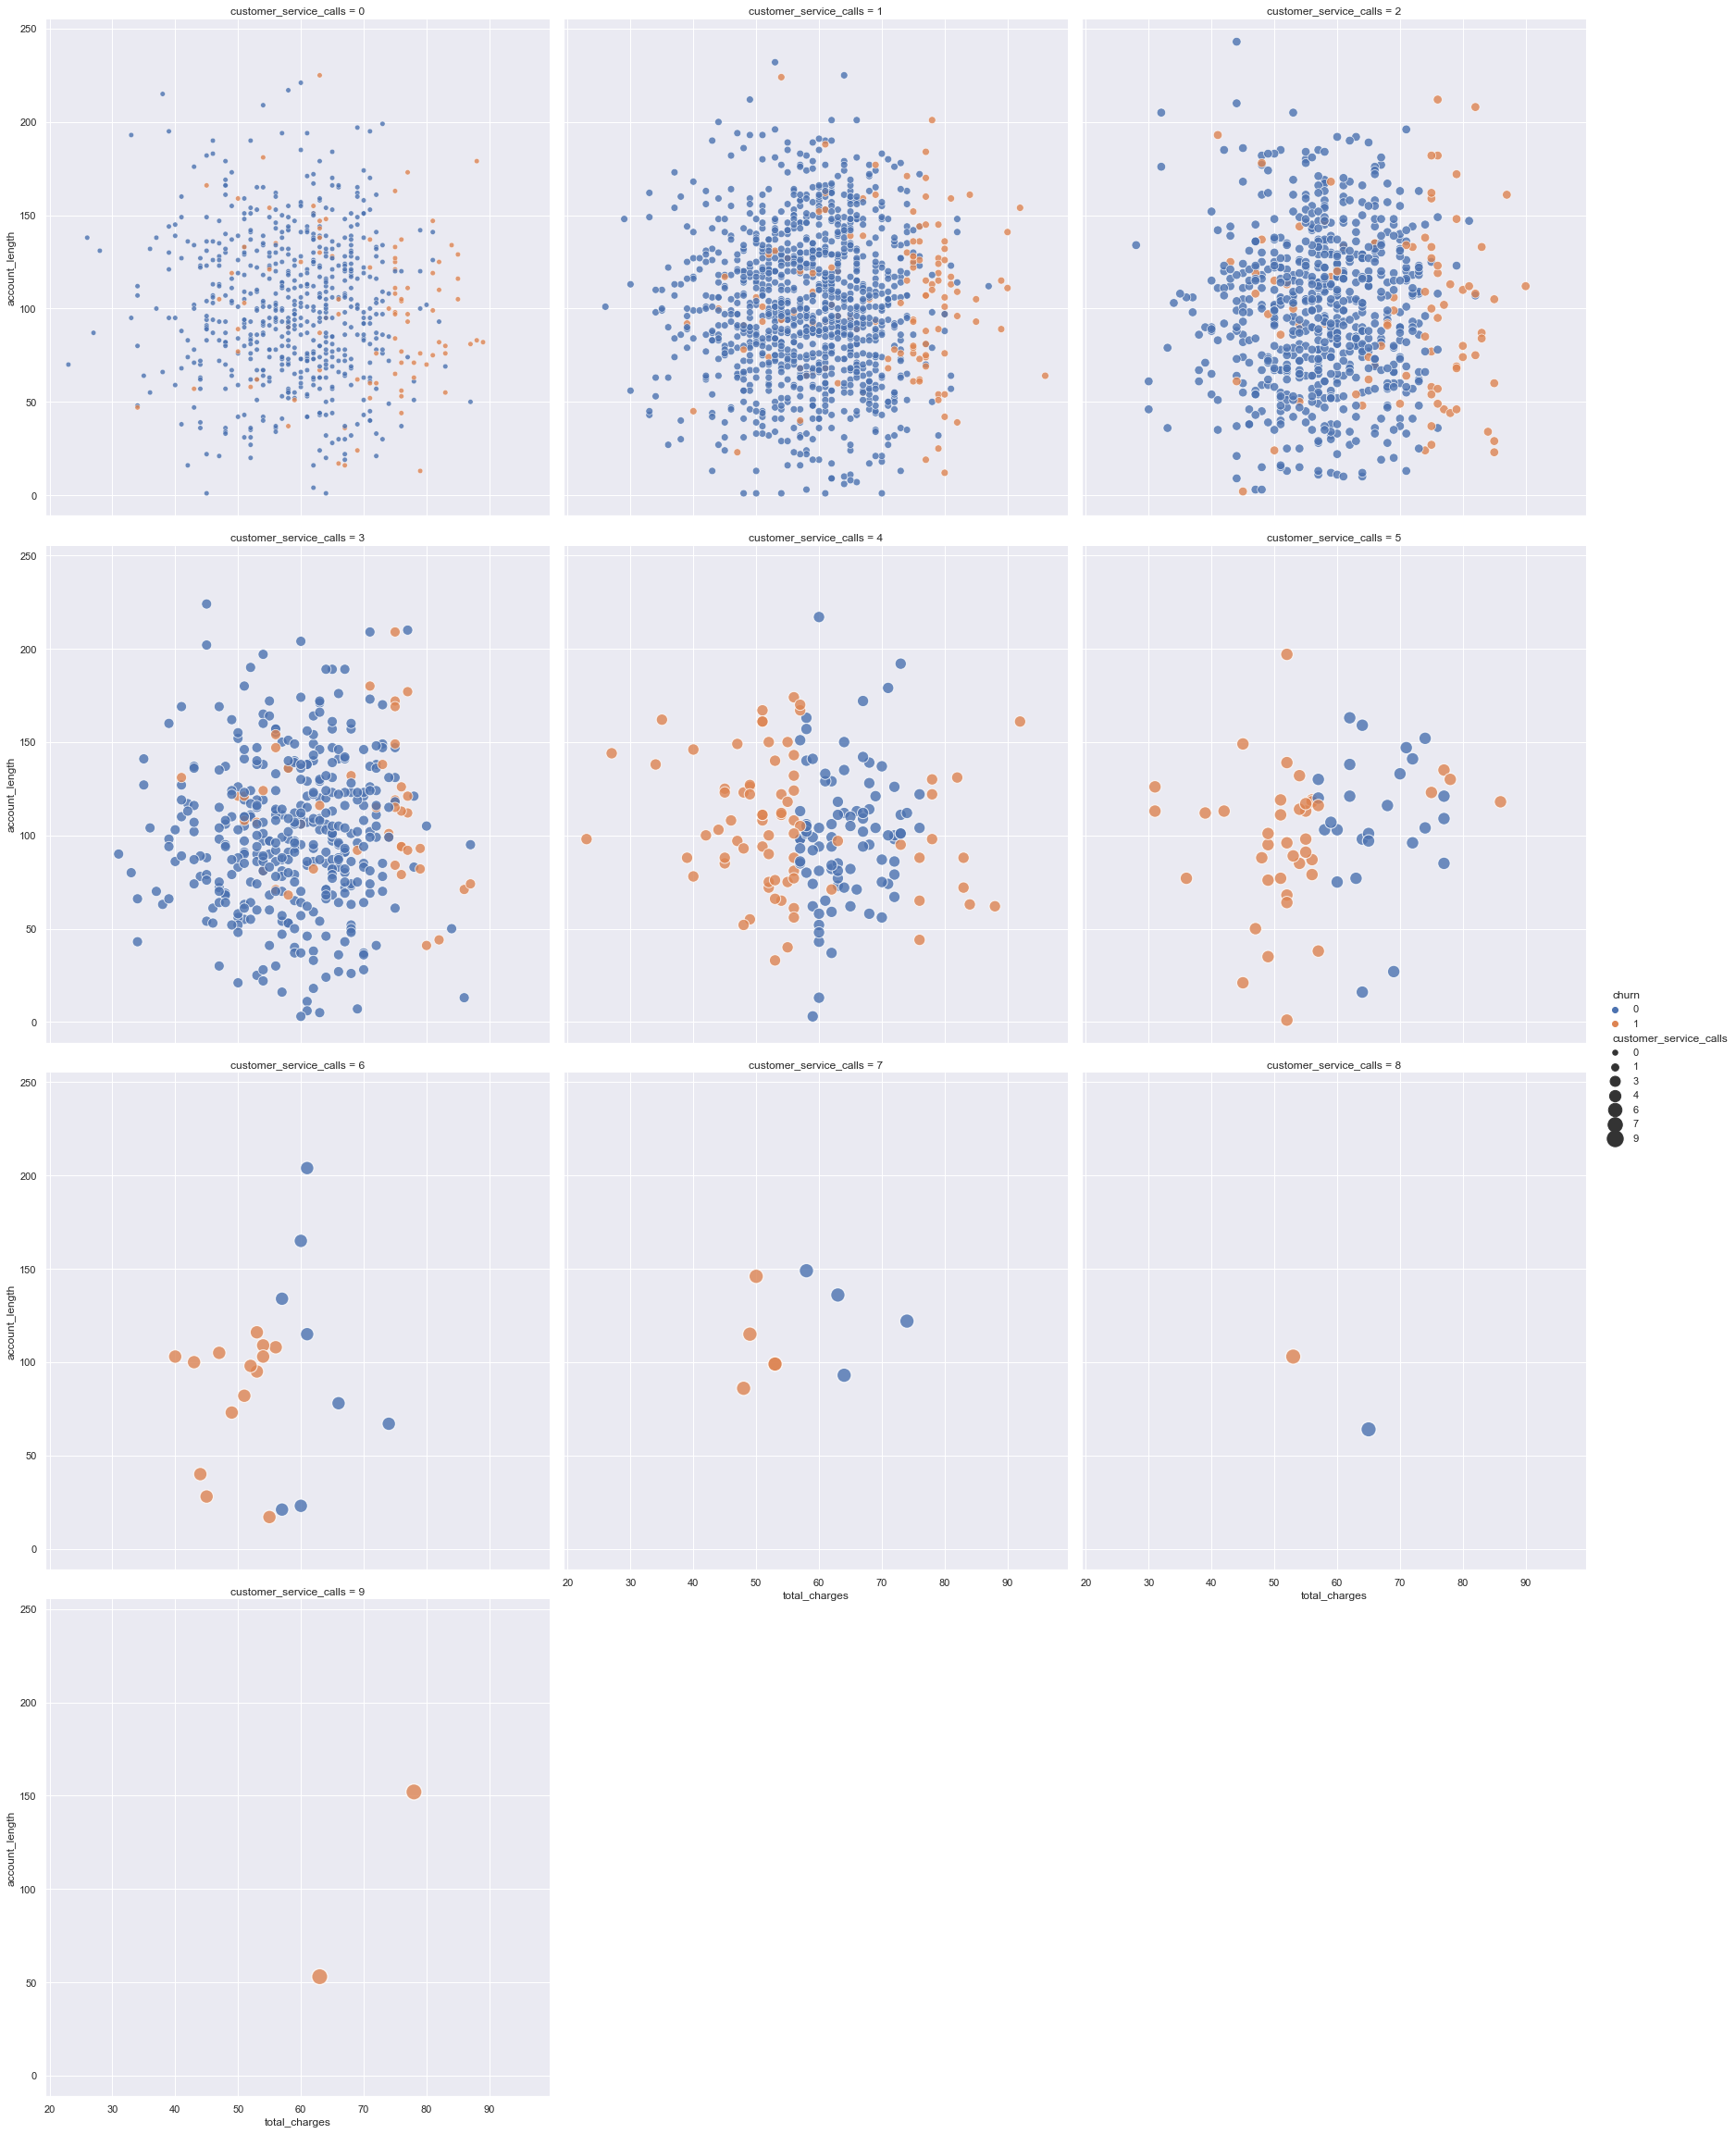

In [57]:
sns.relplot(x='total_charges',  y='account_length', hue='churn', col='customer_service_calls', col_wrap=3, 
            data=df, alpha=0.8, height=8, size='customer_service_calls', sizes=(30,300));

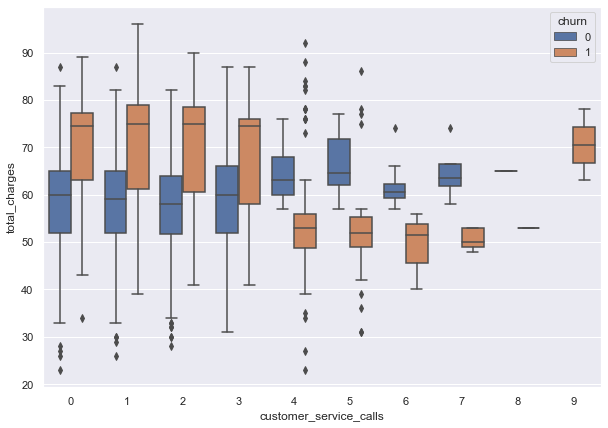

In [59]:
df_cp = df.copy()
df_cp['customer_service_calls'] = df_cp['customer_service_calls'].astype('object')
sns.boxplot(x='customer_service_calls', y='total_charges', data=df_cp, hue='churn');

In [60]:
for i in range(0,len(df_cp)):
    if df['customer_service_calls'][i] <= 3:
        df_cp['customer_service_calls'][i] = '(0,1,2,3)_calls'
        
    elif df['customer_service_calls'][i] <= 7:
        df_cp['customer_service_calls'][i] = '(4,5,6,7)_calls'

    elif df['customer_service_calls'][i] <= 9:
        df_cp['customer_service_calls'][i] = '(8,9)_calls'

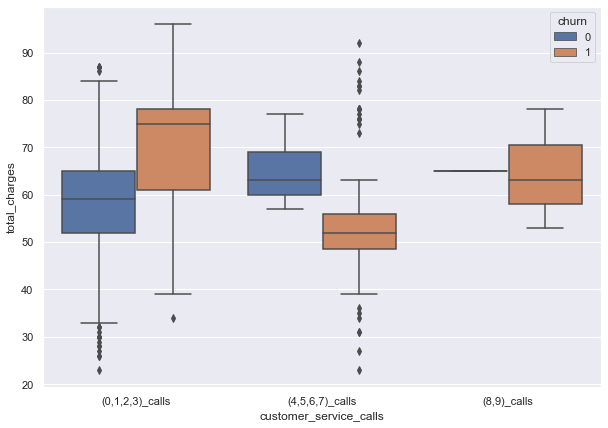

In [62]:
sns.boxplot(x='customer_service_calls', y='total_charges', 
            data=df_cp, hue='churn');

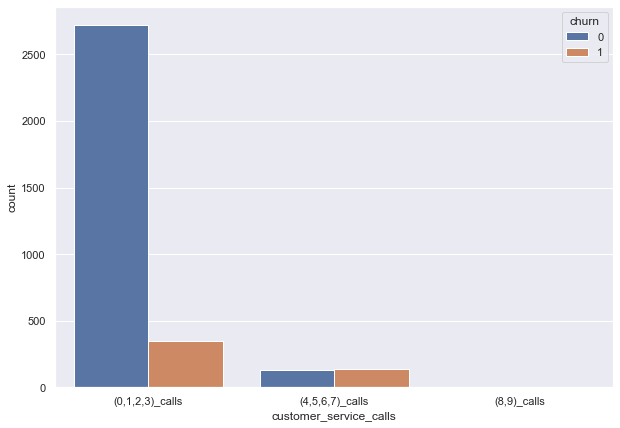

In [63]:
sns.countplot(x='customer_service_calls', hue='churn', data=df_cp);